In [144]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [145]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [146]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [147]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [148]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Initialize StandardScaler
X = df_market_data
scaler = StandardScaler()

# Fit and transform the feature data
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame with the same column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# Display the first few rows of the scaled DataFrame
print(X_scaled_df.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [149]:
# Create a DataFrame with the scaled data
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# Display sample data
X_scaled_df.head


<bound method NDFrame.head of                       price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                         
bitcoin                                  0.508529                    0.493193   
ethereum                                 0.185446                    0.934445   
tether                                   0.021774                   -0.706337   
ripple                                  -0.040764                   -0.810928   
bitcoin-cash                             1.193036                    2.000959   
binancecoin                              0.891871                    1.327295   
chainlink                                0.011397                    2.572251   
cardano                                  0.102530                    1.508001   
litecoin                                 0.077497                    0.334297   
bitcoin-cash-sv                          0.448952                   -0.190684  

---

### Find the Best Value for k Using the Original Data.

In [150]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Display the list
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [151]:
# Create an empty list to store the inertia values
inertia_values = []
# Define the range of k-values
k_values = list(range(1, 12))

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model with k clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the scaled data
    kmeans.fit(X_scaled_df)
    
    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)


# Check lengths
print("Length of k_values:", len(k_values))
print("Length of inertia_values:", len(inertia_values))



Length of k_values: 11
Length of inertia_values: 11


In [152]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

In [153]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Curve',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    width=800,
    height=400,
    line_color='pink'
)

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4 is the best for 'k'

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [154]:
# Initialize the K-Means model using the best value for k
optimal_k = 4

In [155]:
# Fit the K-Means model using the scaled data
kmeans_model = KMeans(n_clusters=optimal_k, random_state=0)
kmeans_model.fit(X_scaled_df)

KMeans(n_clusters=4, random_state=0)

In [156]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_predictions = kmeans_model.predict(X_scaled_df)

# Print the resulting array of cluster values.
cluster_predictions

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0],
      dtype=int32)

In [157]:
# Create a copy of the DataFrame
df_with_clusters = df_market_data.copy()
df_with_clusters.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [158]:
# Add a new column to the DataFrame with the predicted clusters
df_with_clusters['Cluster'] = cluster_predictions

# Display sample data
print(df_with_clusters.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

In [159]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_with_clusters.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="Cluster",                   # Color points by the 'Cluster' column
    cmap='viridis',                # Colormap for clusters
    hover_cols=['coin_id'],        # Show cryptocurrency name on hover
    width=800,
    height=400,
    title="Scatter Plot of Price Change Percentages by Cluster"
)
scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [160]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [161]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_result = pca.fit_transform(X_scaled_df)

pca_df = pd.DataFrame(
    pca_result, 
    columns=['PC1', 'PC2', 'PC3'],  
    index=X_scaled_df.index  
)
# View the first five rows of the DataFrame. 
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [162]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance is 89.50%. 

In [163]:
# Create a new DataFrame with the PCA data.
pca_data = pca.fit_transform(X_scaled_df)
# Creating a DataFrame with the PCA data
# Copy the crypto names from the original data
# Set the coinid column as index
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'], index=df_market_data.index)
# Display sample data
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [164]:
# Create a list with the number of k-values from 1 to 11
# Create a list with k-values from 1 to 11
k_values = list(range(1, 12))

# Display the list of k-values
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [165]:
# Create an empty list to store the inertia values
inertia_values = []
pca = PCA(n_components=3)
pca_data = pca.fit_transform(df_market_data)
df_market_data_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'], index=df_market_data.index)

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
# 2. Fit the model to the data using `df_market_data_pca`
    kmeans.fit(df_market_data_pca)
# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)  

# Display the list of inertia values
print(inertia_values)


[69970518.9945508, 8180192.230746044, 2580721.0778442924, 823747.1295855576, 455921.3498381154, 333792.68231576815, 189798.09284767625, 147296.6611176767, 108686.33066171299, 91083.95490700107, 67961.23617878603]


In [166]:
    # Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': list(range(1, 12)),  # k-values from 1 to 11
    'inertia': inertia_values  # inertia values from the KMeans loop
}
    # Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)


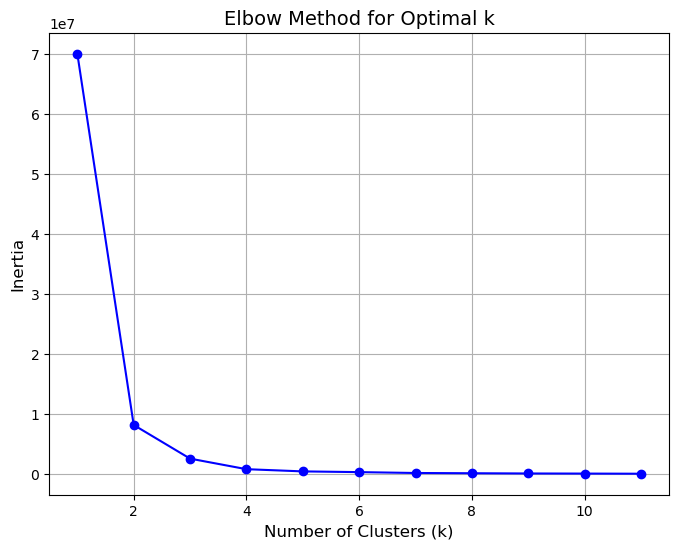

In [167]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))

# Plot inertia values against k-values
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o', linestyle='-', color='b')

# Add chart title and labels
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)

# Display grid for better readability
plt.grid(True)

# Show the plot
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer: The best 'k' is 3


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes, becauase the k value in the orginal data was 4.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [168]:
# Initialize the K-Means model using the best value for k
best_k = 4 

In [169]:
# Fit the K-Means model using the PCA data
kmeans_model = KMeans(n_clusters=best_k, random_state=0)
kmeans_model.fit(pca_data)

KMeans(n_clusters=4, random_state=0)

In [181]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_predictions = kmeans_model.predict(pca_data)
# Print the resulting array of cluster values.
cluster_predictions

array([0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 3, 3, 2, 0, 0, 0, 3],
      dtype=int32)

In [175]:
# Create a copy of the DataFrame with the PCA data
pca_data_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Add a new column to the DataFrame with the predicted clusters
pca_data_df['Cluster'] = cluster_predictions

# Display sample data
print(pca_data_df.head())

          PC1         PC2        PC3  Cluster
0 -341.800963  -51.366775  12.525471        2
1 -249.420466   24.117548 -14.231466        2
2 -402.614721 -118.710737  24.838397        0
3 -406.752437  -79.487286   1.566331        0
4 -382.429948 -103.431959  16.753073        2


In [185]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
pca_data_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])
pca_data_df['Cluster'] = cluster_predictions

# Create the scatter plot
scatter_plot = pca_data_df.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    c='Cluster', 
    cmap='Set1', 
    hover_cols=['coin_id'], 
    title='PCA Scatter Plot with Clusters'
)

# Show the plot
scatter_plot


:Scatter   [PC1]   (PC2,Cluster)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [186]:
# Composite plot to contrast the Elbow curves
k_values = list(range(1, 12))
inertia_values = [69970518.9945508, 8180192.230746044, 2580721.0778442924, 
                  823747.1295855576, 455921.3498381154, 333792.68231576815, 
                  189798.09284767625, 147296.6611176767, 108686.33066171299, 
                  91083.95490700107, 67961.23617878603]

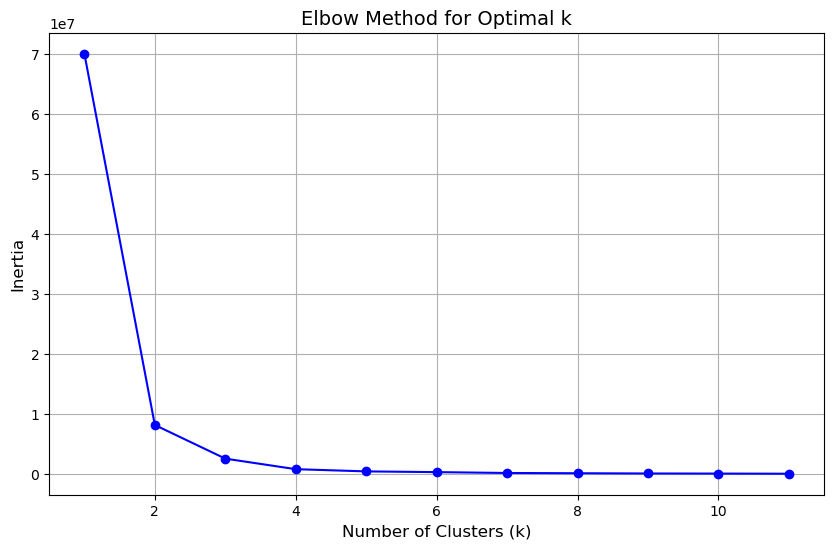

In [187]:
# Composite plot to contrast the clusters
plt.figure(figsize=(10, 6))

# Plot inertia values against k-values
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o', linestyle='-', color='b', label='Inertia')

# Add chart title and labels
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)

# Display grid for better readability
plt.grid(True)

# Show the plot
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** When you reduce the number of features, the model might miss out on key aspects of the data that could help in differentiating between clusters. As a result, the clusters might be less distinct or meaningful, and you might end up with less insightful results.